In [1]:
from array import array
import math
import numpy as np
import random



In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x

par = array('d')
par.append(0.4321)
par.append(1.6789)
par.append(0.50)
par.append(1.0000)

In [3]:

m = 2 #Set the order of the polynomial
n = 15 #Set the number of data points

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(i+1)
    y.append(generator_function(x[i],par) + 10.0*random.gauss(0.0,1.0))
    ex.append(0.0)
    ey.append(5.0*math.sqrt(math.fabs(y[i])))

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[0.01040344 0.02198226 0.08084401]
 [0.02198226 0.08084401 0.50393198]
 [0.08084401 0.50393198 4.42417565]]
Constant matrix:
[[ 0.6]
 [ 4.8]
 [49.6]]
Inverse matrix
[[ 508.59636648 -277.11509109   22.27085826]
 [-277.11509109  193.64434777  -16.99310597]
 [  22.27085826  -16.99310597    1.7546555 ]]
Diagonal Check:
[[ 1.00000000e+00  1.00367877e-15  1.58058517e-17]
 [-2.27982162e-16  1.00000000e+00 -2.53840616e-16]
 [ 2.85054389e-15  1.20250785e-15  1.00000000e+00]]
Coefficients:
[[ 79.63995228]
 [-79.63424127]
 [ 18.82651929]]


In [8]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = 7.602019  yfit = 18.832230
i = 1  y = 15.887135  yfit = -4.322453
i = 2  y = 30.741695  yfit = 10.175902
i = 3  y = 74.617377  yfit = 62.327296
i = 4  y = 156.675343  yfit = 152.131728
i = 5  y = 241.013002  yfit = 279.589199
i = 6  y = 363.643985  yfit = 444.699709
i = 7  y = 558.674374  yfit = 647.463257
i = 8  y = 754.064155  yfit = 887.879843
i = 9  y = 1057.331602  yfit = 1165.949469
i = 10  y = 1411.763051  yfit = 1481.672132
i = 11  y = 1828.112141  yfit = 1835.047835
i = 12  y = 2297.192186  yfit = 2226.076576
i = 13  y = 2877.192081  yfit = 2654.758355
i = 14  y = 3505.340281  yfit = 3121.093173
chi2/dof = 7.859047 / 12.000000


In [9]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 79.639952 +/- 22.552081
p1 = -79.634241 +/- 13.915615
p2 = 18.826519 +/- 1.324634


[ 79.63995261 -79.63424142  18.8265193 ] [[ 508.59637393 -277.11509834   22.27085886]
 [-277.11509834  193.64435368  -16.99310645]
 [  22.27085886  -16.99310645    1.75465554]]
Coefficients (from curve_fit)
[ 79.63995261 -79.63424142  18.8265193 ]
Covariance Matrix (from curve_fit)
[[ 508.59637393 -277.11509834   22.27085886]
 [-277.11509834  193.64435368  -16.99310645]
 [  22.27085886  -16.99310645    1.75465554]]
Chi^2 / dof = 7.859E+00 / 12
Fit Parameter 0: 7.964E+01 +/- 2.255E+01
0 1 -8.830E-01
0 2 7.455E-01
Fit Parameter 1: -7.963E+01 +/- 1.392E+01
1 2 -9.219E-01
Fit Parameter 2: 1.883E+01 +/- 1.325E+00


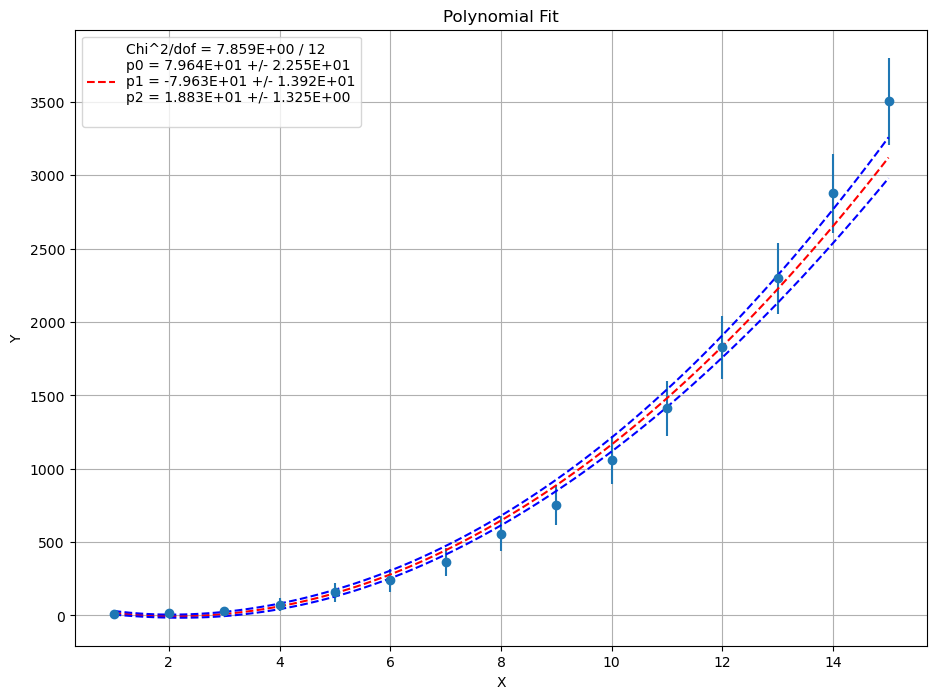

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=ey,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
#popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals)
popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

In [11]:
root_defined = False

if root_defined:
    from ROOT import TCanvas, TFile
    from ROOT import TGraph, TF1, TGraphErrors
    from ROOT import gStyle
    c1 = TCanvas( 'c1', 'Fitting Example with Errors', 200, 10, 700, 500 )
    c1.SetGridx()
    c1.SetGridy()
    c1.GetFrame().SetFillColor( 21 )
    c1.GetFrame().SetBorderMode(-1 )
    c1.GetFrame().SetBorderSize( 5 )

    poltype = "pol"+str(m)
    print (poltype)
    gr = TGraphErrors(n,x,y,ex,ey)
    pfit1 = TF1("pfit1",poltype)
    gr.SetMarkerStyle(21)
    gr.SetTitle("Cubic Fit")
    gr.GetXaxis().SetTitle("X")
    gr.GetYaxis().SetTitle("Y")
    gr.Fit("pfit1","q")
    pfit1chi2 = pfit1.GetChisquare()
    pfit1ndf = pfit1.GetNDF()
    pfit1chi2ndf = pfit1chi2/pfit1ndf
    print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
    gr.Draw("AP")
    gStyle.SetOptFit(1)
    c1.Draw()